# Omdena-Milan Covid19 Crimes
### Exploratory analysis for assessing the impact of Covid-19 on crime cates in Italy
#### Author: Maria Fisher 


The main objective of this study is to gather information about crime in Italy for the period of covid19 pandemic.



In [5]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
today = date.today()
d = today.strftime("%m-%d-%y")



In [6]:

root = "https://www.google.com"
link = "https://www.google.com/search?q=furto+in+Italia&biw=915&bih=933&tbm=nws&ei=SFVOZLWrJJyFhbIPmLiHiAs&ved=0ahUKEwi178umxNH-AhWcQkEAHRjcAbEQ4dUDCA0&uact=5&oq=furto+in+Italia&gs_lcp=Cgxnd3Mtd2l6LW5ld3MQAzIECAAQHjIGCAAQHhAPMgYIABAeEA8yBggAEB4QDzIECAAQHjIECAAQHjIGCAAQBRAeMggIABAIEB4QDzIGCAAQCBAeMgYIABAIEB46BggAEAcQHjoGCAAQHhANOggIABAeEA0QDzoICAAQCBAeEA06CAgAEAgQBxAeOggIABAFEB4QDVCRB1j3KmCML2gAcAB4AIABe4gBwAaSAQMwLjeYAQCgAQHAAQE&sclient=gws-wiz-news"

req = Request(link, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
)


   

In [7]:
for item in soup.find_all("div",attrs={"class":"g"}):
    print(item)

AttributeError: 'str' object has no attribute 'descendants'

In [ ]:
item

Google search 2019


In [8]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}

url = "https://www.google.com/search?q=furti+in+Italia"
html = requests.get(url,headers=headers)

In [9]:
soup = soup(html.text, 'html.parser')

In [10]:
newsP1 = soup.find_all("div",{"class":"g"})

[<div class="g wF4fFd JnwWd g-blk" data-hveid="CAkQAA" data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QjDYoAHoECAkQAA" lang="en-GB"><div class="dG2XIf XzTjhb"><div class="c2xzTb"><div><div><div class="xpdopen"><div class="ifM9O"><h2 class="Uo8X3b OhScic zsYMMe">Featured snippet from the web</h2><div><div><div class="yp1CPe wDYxhc NFQFxe viOShc LKPcQc" data-md="471" lang="en-GB"><div class="V3FYCf"><div class="wDYxhc" data-md="61" lang="en-GB" style="clear:none"><div aria-level="3" class="LGOjhe" data-attrid="wa:/description" data-hveid="CBEQAA" role="heading"><span class="ILfuVd" lang="it"><span class="hgKElc">I furti sono scesi da 1.477.000 circa nel 2012 a <b>1.189.000 nel 2018</b>. Le rapine sono scese da 41.281 nel 2012 a 28.390 nel 2018.</span></span></div></div><div class="g"><div data-hveid="CAgQAA" data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QFSgAegQICBAA" lang="it"><div class="tF2Cxc"><div class="yuRUbf"><a data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QFnoECAgQAw" href="https://www.neta
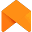
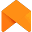
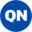
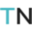
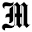
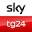
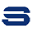
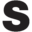

In [11]:
newsP1

In [12]:
g=0
newsData = [ ]
l={}
date=[]

for i in range(0,len(newsP1)):
                    link = newsP1[i].find('a').get('href')

                    if(link is not None):
                        if(link.find('https') != -1 and link.find('http') == 0 and link.find("SoaBEf") == -1):
                            g=g+1
                            l["link"]=link
                            try:
                                l["title"]=newsP1[i].find("h3").text
                            except:
                                l["title"]=None 
                            try:
                                l["date"]=newsP1[i].find("span",{"class":"dyjrff ob9lvb"}).text
                            except:
                                l["date"]=None 
                                
                                l["position"]=g 

                                newsData.append(l)  

                                l={}   

                            else:
                                     continue
                        else:
                                     continue
              
                    print(newsData)

[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'position': 1}]
[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'position': 1}, {'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'position': 2}]
[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'position': 1}, {'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'position': 2}, {'link': 'https://lab24.ilsole24ore.com/indice-della-criminalita/', 'title': "Reati, furti, rapine: trova l'indice della criminalità 2022 ... - Lab24", 

In [13]:
df = pd.DataFrame(newsData, columns=['link', 'title', 'date'])
df

,link,title,date
0,https://www.netatmo.com/it-it/blog/burglary-fr...,Criminalità in Italia: cosa dicono i numeri su...,None
1,https://www.netatmo.com/it-it/blog/burglary-fr...,Criminalità in Italia: cosa dicono i numeri su...,None
2,https://lab24.ilsole24ore.com/indice-della-cri...,"Reati, furti, rapine: trova l'indice della cri...",None
3,https://www.quotidiano.net/cronaca/furti-rapin...,In Italia aumentano furti (+20%) e rapine (+18...,None
4,https://www.truenumbers.it/furti-in-casa/,"Furti in casa in Italia: colpite 10,3 famiglie...",None
5,https://www.iodonna.it/attualita/costume-e-soc...,La classifica delle città più pericolose d'Italia,None
6,https://www.ilmessaggero.it/italia/furti_rapin...,"Rapine, omicidi e furti: è boom nel 2022. I da...",None
7,https://tg24.sky.it/cronaca/2022/08/11/furti-c...,"Furti in casa, uno ogni tre minuti in Italia: ...",None
8,https://www.sicuritalia.it/news/casa/quali-son...,Rischio furti: quali sono le città più pericol...,None
9,https://www.sicurezzamagazine.it/criminalita-d...,Criminalità: diffusi i dati relativi ai reati ...,None


In [ ]:
 df.to_csv('googledata2019-2020.csv')

Google search 2020

In [14]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}

url = "https://www.google.com/search?q=furti+in+Italia%252C+2019"
html = requests.get(url,headers=headers)

In [15]:
soup = soup(html.text, 'html.parser')

In [16]:
newsP1 = soup.find_all("div",{"class":"g"})

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

[<div class="g wF4fFd JnwWd g-blk" data-hveid="CAkQAA" data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QjDYoAHoECAkQAA" lang="en-GB"><div class="dG2XIf XzTjhb"><div class="c2xzTb"><div><div><div class="xpdopen"><div class="ifM9O"><h2 class="Uo8X3b OhScic zsYMMe">Featured snippet from the web</h2><div><div><div class="yp1CPe wDYxhc NFQFxe viOShc LKPcQc" data-md="471" lang="en-GB"><div class="V3FYCf"><div class="wDYxhc" data-md="61" lang="en-GB" style="clear:none"><div aria-level="3" class="LGOjhe" data-attrid="wa:/description" data-hveid="CBEQAA" role="heading"><span class="ILfuVd" lang="it"><span class="hgKElc">I furti sono scesi da 1.477.000 circa nel 2012 a <b>1.189.000 nel 2018</b>. Le rapine sono scese da 41.281 nel 2012 a 28.390 nel 2018.</span></span></div></div><div class="g"><div data-hveid="CAgQAA" data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QFSgAegQICBAA" lang="it"><div class="tF2Cxc"><div class="yuRUbf"><a data-ved="2ahUKEwjW2LOJ0YP_AhVzUqQEHahqDI4QFnoECAgQAw" href="https://www.neta
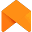
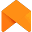
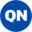
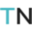
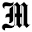
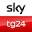
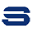
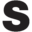

In [17]:
newsP1

In [18]:
g=0
newsData = [ ]
l={}
date=[]
source=[]

for i in range(0,len(newsP1)):
                    link = newsP1[i].find('a').get('href')

                    if(link is not None):
                        if(link.find('https') != -1 and link.find('http') == 0 and link.find("SoaBEf") == -1):
                            g=g+1
                            l["link"]=link
                            try:
                                l["title"]=newsP1[i].find("h3").text
                            except:
                                l["title"]=None 
                            try:
                                l["date"]=newsP1[i].find("span",{"class":"MUxGbd wuQ4Ob WZ8Tjf"}).text
                            except:
                                l["date"]=None 

                            try:
                                l["source"]=newsP1[i].find("div",{"class":"iRPxbe"}).text
                            except:
                                l["source"]=None 

                                l["position"]=g 

                                newsData.append(l)  

                                l={}   

                            else:
                                     continue
                        else:
                                     continue
              
                    print(newsData)

[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'source': None, 'position': 1}]
[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'source': None, 'position': 1}, {'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'source': None, 'position': 2}]
[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'source': None, 'position': 1}, {'link': 'https://www.netatmo.com/it-it/blog/burglary-france', 'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo', 'date': None, 'source': None, 'position': 2}, {'link': 'https://lab24.ilsole24ore.com/indice-della-criminalita/', 'tit

In [19]:
newsData

[{'link': 'https://www.netatmo.com/it-it/blog/burglary-france',
  'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo',
  'date': None,
  'source': None,
  'position': 1},
 {'link': 'https://www.netatmo.com/it-it/blog/burglary-france',
  'title': 'Criminalità in Italia: cosa dicono i numeri sui furti - Netatmo',
  'date': None,
  'source': None,
  'position': 2},
 {'link': 'https://lab24.ilsole24ore.com/indice-della-criminalita/',
  'title': "Reati, furti, rapine: trova l'indice della criminalità 2022 ... - Lab24",
  'date': None,
  'source': None,
  'position': 3},
 {'link': 'https://www.quotidiano.net/cronaca/furti-rapine-violenze-sessuali-italia-2022-1.8423068',
  'title': 'In Italia aumentano furti (+20%) e rapine (+18). Il report ...',
  'date': None,
  'source': None,
  'position': 4},
 {'link': 'https://www.truenumbers.it/furti-in-casa/',
  'title': 'Furti in casa in Italia: colpite 10,3 famiglie ogni mille',
  'date': None,
  'source': None,
  'position': 

In [20]:
df = pd.DataFrame(newsData, columns=['link', 'title', 'date'])
df

,link,title,date
0,https://www.netatmo.com/it-it/blog/burglary-fr...,Criminalità in Italia: cosa dicono i numeri su...,None
1,https://www.netatmo.com/it-it/blog/burglary-fr...,Criminalità in Italia: cosa dicono i numeri su...,None
2,https://lab24.ilsole24ore.com/indice-della-cri...,"Reati, furti, rapine: trova l'indice della cri...",None
3,https://www.quotidiano.net/cronaca/furti-rapin...,In Italia aumentano furti (+20%) e rapine (+18...,None
4,https://www.truenumbers.it/furti-in-casa/,"Furti in casa in Italia: colpite 10,3 famiglie...",None
5,https://www.iodonna.it/attualita/costume-e-soc...,La classifica delle città più pericolose d'Italia,4 Oct 2022 —
6,https://www.ilmessaggero.it/italia/furti_rapin...,"Rapine, omicidi e furti: è boom nel 2022. I da...",15 Aug 2022 —
7,https://tg24.sky.it/cronaca/2022/08/11/furti-c...,"Furti in casa, uno ogni tre minuti in Italia: ...",11 Aug 2022 —
8,https://www.sicuritalia.it/news/casa/quali-son...,Rischio furti: quali sono le città più pericol...,None
9,https://www.sicurezzamagazine.it/criminalita-d...,Criminalità: diffusi i dati relativi ai reati ...,15 Feb 2022 —


In [ ]:
 df.to_csv('googledata2019-2020.csv')